In [1]:
#All of the libries and my file directory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.linear_model import LinearRegression
save_path = "C:\\Users\\Wesle\\Downloads\\"

# **Question 1**

In [2]:
#constants of the problem,
#diffrent values may be pluged in for a diffrent day with diffrent tempratures or for a diffrent house example
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23] # Hours
temprature = [29.4,29.4,28.9,28.3,28.3,28.3,28.9,31.1,32.8,34.4,35.6,36.1,37.8,37.8,38.9,38.9,37.8,37.2,36.1,34.4,33.3,32.8,32.2,31.7]  #degrees C
wind_speed = [9.7,8.0,13,8.0,11,13,11,14,14,16,14,8.0,14,13,21,26,16,16,13,9.7,11,13,19,19] # km s^-1
humidity = [74,74,74,77,77,77,74,67,61,56,52,51,45,43,38,38,42,43,47,51,55,59,63,65] #Humidity  %
house_volume = [201.168,144.018,169.164,1271.016] #cubic meters
people = [3,3,2,6] #people per house
square_meterage = [88,63,74,278] # m^2
outside_walls = [4,1,1,4] #1 outside facing walls for appartments; 4 outside walls for free standing resedence 
shade_level = [.55,.775,1,1] # % of the sun blocked by the shade
heat_transfer_coefficient = [.08, .08, .04, .04] #coefficients for the diffrent materials of the houses
floor_height = [2.286] #assumed height of the house per floor
temprature_kelvin = []
wall_area = []
angle_incidence = [0.585,0.585,0.585,0.585,0.585,0.585,0.585,0.696,0.81,0.922,1.033,1.145,1.258,1.37,1.258,1.145,1.033,0.922,0.81,0.696,0.585,0.585,0.585,0.585]# angle of the sun relative to memphis
for c in range (len(square_meterage)):
    wall_area.append(np.sqrt(square_meterage[c])*floor_height[0]*outside_walls[c]) #finds the area of all the walls assuming the house is a square
for c in range (len(temprature)):
    temprature_kelvin.append(temprature[c] + 273.15) #converts temprature to kelvin

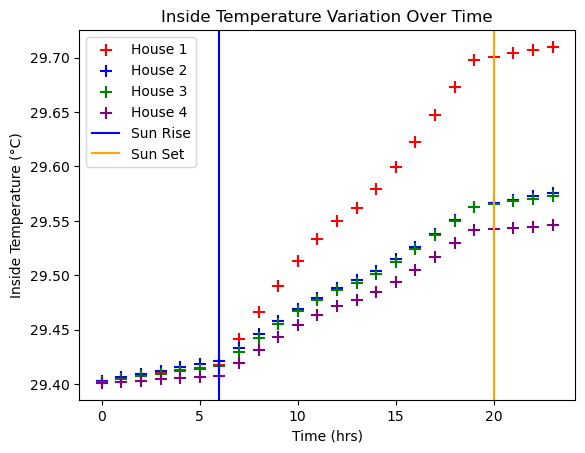

In [3]:
fig, ax = plt.subplots()
colors = ['red', 'blue', 'green', 'purple']
for k in range (4): #runs through all four house examples given 
    inside_temprature = temprature_kelvin[0] #initial temprature is set to the outside temprature at intical time
    for c in range (len(time)): #this loops through all the times and by extencion the temprature creating an Euler's method for finding delta temprature
        air_density=((100474.15/(287.058*inside_temprature))+((10**((8.07131-1730.63)/(233.426+inside_temprature)))/(461.495*inside_temprature))) #kg m^-3 this takes the air pressure devided by the specific 
        #gas constant and temprature and adds it to the water vapor pressure the gas constant for water and the temprature to get the air density 
        air_specific_heat = (1005 * air_density) #finds specific heat in J/kg * K
        air_mass = (house_volume[k] * air_density)#finds air mass at all tempratures kg
        if time[c] == 0: #at time = 0 the 
            Qsolar = 0
            Qinternal = 0
            Qconductivity = 0
        if angle_incidence[c] == 0.585: #if the sun is bellow the hirison this runs and sets Qsolar to 0
            Qsolar =  0 
            Qinternal = (people[k] * 71.785) + (people[k] * 45.415) + (square_meterage[k]*4) #finds power generated by the people and applances in the homes in Watts
            Qconductivity = (heat_transfer_coefficient[k] * wall_area[k] * (temprature_kelvin[c] - inside_temprature))/0.1397 #finds the power that is transfered through the walls of the house in watts
        else:
            Qsolar = shade_level[k] * wall_area[k] * 0.24 * 0.75 * 1370 * np.cos(angle_incidence[c]) * np.sin(angle_incidence[c]) #finds the amount of power the sun's ray through the windows bring in watts
            Qinternal = (people[k] * 71.785) + (people[k] * 45.415) + (square_meterage[k]*4) #finds power generated by the people and applances in the homes in Watts
            Qconductivity = (heat_transfer_coefficient[k] * wall_area[k] * (temprature_kelvin[c] - inside_temprature))/0.1397 #finds the power that is transfered through the walls of the house in watts
        Qtotal = Qsolar + Qinternal + Qconductivity #finds the total amount of power
        inside_temprature = ((Qtotal)/(air_specific_heat*air_mass)) + inside_temprature #solves the equation for delta temprature 
        #the variable is saved as itself setting the base line for the net delta temprature giving a Euler's approximation of the tempraure in the house
        inside_temprature_celsius = inside_temprature - 273.15 #converts the tempratue to a readable celsius  
        ax.scatter(time[c], inside_temprature_celsius, marker='+', s=80, color=colors[k], label=f'House {k+1}'  if c == 0 else "") #plots the temprature and the time and sets the legend for the first point 
ax.axvline(x=6, color='Blue', label='Sun Rise') #plots a line for the sun rise time
ax.axvline(x=20, color='Orange', label='Sun Set') #plots a line for the sun set time
ax.legend()
plt.xlabel("Time (hrs)")
plt.ylabel("Inside Temperature (°C)")
plt.title("Inside Temperature Variation Over Time")
plt.savefig(save_path + 'Inside_Temperature_Variation_Over_Time.png', bbox_inches='tight', pad_inches=0)
plt.show()

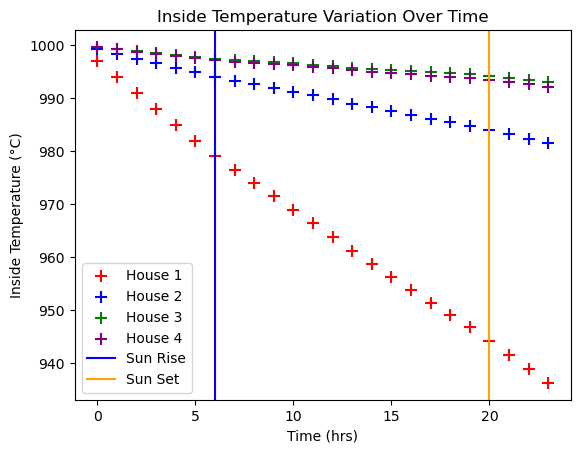

In [4]:
fig, ax = plt.subplots()
colors = ['red', 'blue', 'green', 'purple']
for k in range (4): #runs through all four house examples given 
    inside_temprature = (1000 + 273.15) #initial temprature is set to 1000 degrees C to stress test the system
    for c in range (len(time)): #this loops through all the times and by extencion the temprature creating an Euler's method for finding delta temprature
        air_density=((100474.15/(287.058*inside_temprature))+((10**((8.07131-1730.63)/(233.426+inside_temprature)))/(461.495*inside_temprature))) #kg m^-3 this takes the air pressure devided by the specific 
        #gas constant and temprature and adds it to the water vapor pressure the gas constant for water and the temprature to get the air density 
        air_specific_heat = (1005 * air_density) #finds specific heat in J/kg * K
        air_mass = (house_volume[k] * air_density)#finds air mass at all tempratures kg
        if time[c] == 0: #at time = 0 the 
            Qsolar = 0
            Qinternal = 0
            Qconductivity = 0
        if angle_incidence[c] == 0.585: #if the sun is bellow the hirison this runs and sets Qsolar to 0
            Qsolar =  0 
            Qinternal = (people[k] * 71.785) + (people[k] * 45.415) + (square_meterage[k]*4) #finds power generated by the people and applances in the homes in Watts
            Qconductivity = (heat_transfer_coefficient[k] * wall_area[k] * (temprature_kelvin[c] - inside_temprature))/0.1397 #finds the power that is transfered through the walls of the house in watts
        else:
            Qsolar = shade_level[k] * wall_area[k] * 0.24 * 0.75 * 1370 * np.cos(angle_incidence[c]) * np.sin(angle_incidence[c]) #finds the amount of power the sun's ray through the windows bring in watts
            Qinternal = (people[k] * 71.785) + (people[k] * 45.415) + (square_meterage[k]*4) #finds power generated by the people and applances in the homes in Watts
            Qconductivity = (heat_transfer_coefficient[k] * wall_area[k] * (temprature_kelvin[c] - inside_temprature))/0.1397 #finds the power that is transfered through the walls of the house in watts
        Qtotal = Qsolar + Qinternal + Qconductivity #finds the total amount of power
        inside_temprature = ((Qtotal)/(air_specific_heat*air_mass)) + inside_temprature #solves the equation for delta temprature 
        #the variable is saved as itself setting the base line for the net delta temprature giving a Euler's approximation of the tempraure in the house
        inside_temprature_celsius = inside_temprature - 273.15 #converts the tempratue to a readable celsius  
        ax.scatter(time[c], inside_temprature_celsius, marker='+', s=80, color=colors[k], label=f'House {k+1}'  if c == 0 else "") #plots the temprature and the time and sets the legend for the first point 
ax.axvline(x=6, color='Blue', label='Sun Rise') #plots a line for the sun rise time
ax.axvline(x=20, color='Orange', label='Sun Set') #plots a line for the sun set time
ax.legend()
plt.xlabel("Time (hrs)")
plt.ylabel("Inside Temperature (°C)")
plt.title("Inside Temperature Variation Over Time")
plt.savefig(save_path + 'Inside_Temperature_Variation_Over_Time_1000.png', bbox_inches='tight', pad_inches=0)
plt.show()

# **Question 2**

In [5]:
percent_energy_in_summer = (27890000000+31120000000+31330000000)/(28750000000+25300000000+22950000000+22150000000+24820000000+27890000000+31120000000+31330000000+27590000000+24280000000+22800000000+25350000000) 
# finds the amount of power used in summer monthes compared to the rest of the year

intercept: 64132092986.19342
slope: [-30329881.64609862]
coefficient of determination: 0.7945272740417657


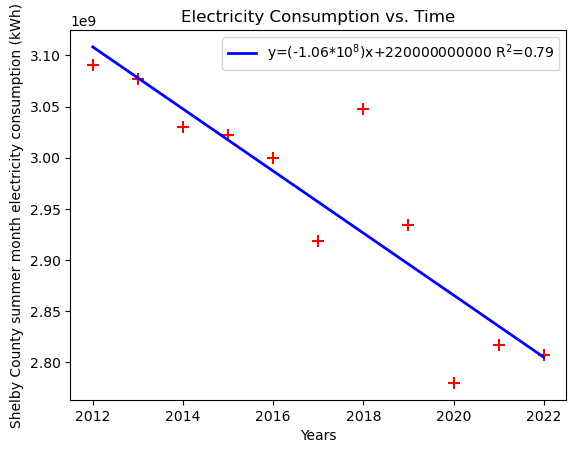

intercept: 4654252.363636365
slope: [-1844.63636364]
coefficient of determination: 0.6740035371661004

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8843  , p=0.0342  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=9.8347  , p=0.0017  , df=1
likelihood ratio test: chi2=6.8485  , p=0.0089  , df=1
parameter F test:         F=6.8843  , p=0.0342  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.8216  , p=0.0286  , df_denom=4, df_num=2
ssr based chi2 test:   chi2=44.1970 , p=0.0000  , df=2
likelihood ratio test: chi2=15.9910 , p=0.0003  , df=2
parameter F test:         F=9.8216  , p=0.0286  , df_denom=4, df_num=2
Pearson correlation between residuals: 0.3985


C:\Users\Wesle\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


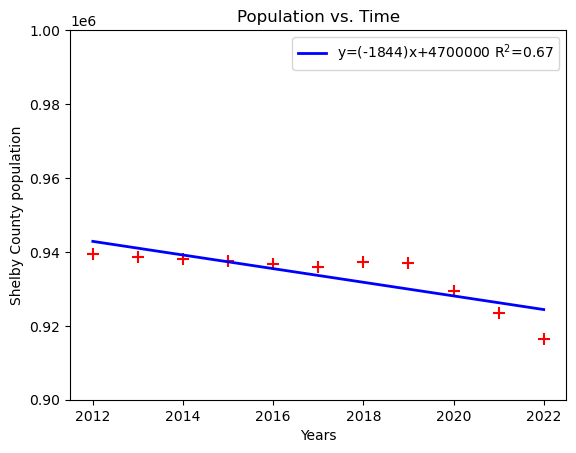

In [6]:
years_energy = np.array([2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012]).reshape((-1, 1)) #the years we had data for in memphis
energy_used = np.array([9768296000,9800375000,9672364000,10208674000,10604732000,10154668000,10436626000,10514853000,10544122000,10705452000,10753992000]) #the total energy used in a year in memphis kWh
energy_used = (energy_used*percent_energy_in_summer) #finds just the energy used in the 3 summer months
fig, ax = plt.subplots()
energy_model = LinearRegression().fit(years_energy, energy_used)#finds a regression the relationship between years and energy used in summer 
print(f"intercept: {energy_model.intercept_}")#prints intersept
print(f"slope: {energy_model.coef_}")#prints slope
ax.scatter(years_energy, energy_used, marker='+', s=80, color='red')#plots the data
energy_predictions = energy_model.predict(years_energy)#creates a line for the regression prediction
ax.plot(years_energy, energy_predictions, color='blue', linewidth=2, label="y=(-1.06*10$^{8}$)x+220000000000 R$^{2}$=0.79")#plots the regression with the 
ax.legend()
plt.xlabel("Years")
plt.ylabel("Shelby County summer month electricity consumption (kWh)")
plt.title("Electricity Consumption vs. Time")
r_sq = energy_model.score(years_energy, energy_used)#finds the r^2 value
print(f"coefficient of determination: {r_sq}")
plt.savefig(save_path + 'Shelby_County_electricity_consumption.png', bbox_inches='tight', pad_inches=0)
plt.show()
population = np.array([916371,923352,929388,937070,937239,936012,936716,937598,937949,938713,939421])#this is the poplulation data for the county of shelby 
fig, ax = plt.subplots()
population_model = LinearRegression().fit(years_energy, population)#finds the relationship between the years and population
print(f"intercept: {population_model.intercept_}")
print(f"slope: {population_model.coef_}")
ax.scatter(years_energy, population, marker='+', s=80, color='red')#plots years and population
population_predictions = population_model.predict(years_energy)#creates a prediction based on the regression of the years and population
ax.plot(years_energy, population_predictions, color='blue', linewidth=2, label="y=(-1844)x+4700000 R$^{2}$=0.67")#plots the line
ax.legend()
plt.xlabel("Years")
plt.ylabel("Shelby County population")
plt.title("Population vs. Time")
ax.set_ylim([900000,1000000])#makes it more viewable
r_sq = population_model.score(years_energy, population)#finds r^2 of years and population
print(f"coefficient of determination: {r_sq}")

data = {'Energy Used': energy_used, 'Population': population}

df = pd.DataFrame(data)

grangercausalitytests(df, maxlag=2, verbose=True)# Perform Granger causality test with a max lag of 2
energy_residuals = energy_used - energy_model.predict(years_energy)#finds the resudyaks if the energy and population
population_residuals = population - population_model.predict(years_energy)
corr_residuals, _ = pearsonr(energy_residuals, population_residuals)  #finds the relationship between tghe energy usage and the populatuon
print(f"Pearson correlation between residuals: {corr_residuals:.4f}")

plt.savefig(save_path + 'Population_Over_Time.png', bbox_inches='tight', pad_inches=0)
plt.show()


Testing if Year Granger-causes Energy Used:


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6758  , p=0.0363  , df_denom=7, df_num=1
ssr based chi2 test:   chi2=9.5369  , p=0.0020  , df=1
likelihood ratio test: chi2=6.6972  , p=0.0097  , df=1
parameter F test:         F=6.6758  , p=0.0363  , df_denom=7, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1505  , p=0.1302  , df_denom=5, df_num=2
ssr based chi2 test:   chi2=11.3417 , p=0.0034  , df=2
likelihood ratio test: chi2=7.3390  , p=0.0255  , df=2
parameter F test:         F=3.5949  , p=0.1078  , df_denom=5, df_num=2
Pearson correlation between residuals: 0.3985
R-squared for multiple regression model: 0.827155178102778


C:\Users\Wesle\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


887504.9090909096


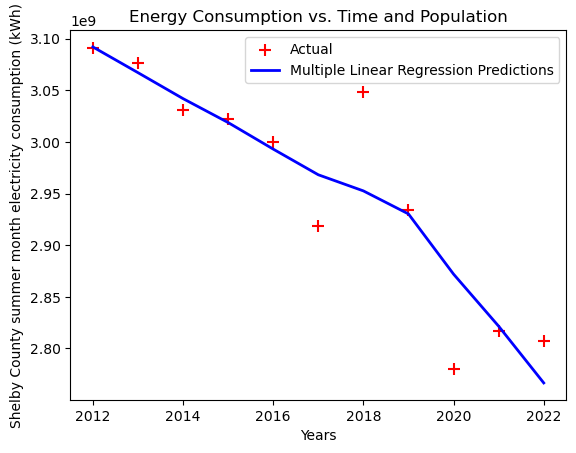

In [7]:
X = np.column_stack((years_energy, population))  # Combine years and population into a single feature matrix
y = energy_used 
multiple_regressor = LinearRegression().fit(X, y)#preforms a mutiple regression fit to the years population and energy usage
energy_predictions_multiple = multiple_regressor.predict(X) #finds the line of the regression

fig, ax = plt.subplots()
ax.scatter(years_energy, energy_used, marker='+', s=80, color='red', label='Actual')#plots the years and energy
ax.plot(years_energy, energy_predictions_multiple, color='blue', linewidth=2, label="Multiple Linear Regression Predictions") #plots the regression
ax.legend()
plt.xlabel("Years")
plt.ylabel("Shelby County summer month electricity consumption (kWh)")
plt.title("Energy Consumption vs. Time and Population")
data = pd.DataFrame({#sets up the data for the granger test
    'Energy_Used': energy_used,   # Dependent variable
    'Year': years_energy.flatten(),  # Independent variable 1
    'Population': population  # Independent variable 2
})
data = data.sort_values(by='Year')#sorts data
max_lag = 2

print("\nTesting if Year Granger-causes Energy Used:\n")# Test whether year granger causes Energy_Used
grangercausalitytests(data[['Energy_Used', 'Year']], maxlag=max_lag, verbose=True)
energy_residuals = energy_used - energy_model.predict(years_energy)# Calculate residuals for energy consumption

population_residuals = population - population_model.predict(years_energy)# Calculate residuals for population

corr_residuals, _ = pearsonr(energy_residuals, population_residuals)# Compute Pearson correlation between the two sets of residuals
print(f"Pearson correlation between residuals: {corr_residuals:.4f}")

r_sq_multiple = multiple_regressor.score(X, y)#finds the r^2
print(f"R-squared for multiple regression model: {r_sq_multiple}")
plt.savefig(save_path + 'Population_Over_Time_and_Population.png', bbox_inches='tight', pad_inches=0)
print (population_model.predict([[2042]])[0])
plt.show()

# **Question 3**

In [8]:
zip_codes = [38103,38002,38017,38016,38018,38028,38060,38066,38104,38105,38106,38107,38108,38109,38111,38112,38117,38125,38126,38127,38128,38133,38134,38135,38138,38139,38141]
data = {
    'Health Burden Rank' : [0.4084,0.0706,0.1933,0.0695,0.0694,0.0707,0.4342,0.1939,0.4134,0.4127,0.1865,0.4142,0.4151,0.1803,0.1892,0.4148,0.1892,0.0642,.4081,0.1923,0.1939,0.4274,0.1989,0.1989,0.1919,0.1933,0.0614],
    'Median Income' : [75763,115478,135946,75719,89627,150847,84277,105282,56452,29316,29818,36393,35435,36934,52806,52639,93688,83184,30825,37768,43166,82485,61172,92458,130125,174052,64050],
    '% Older 65' : [0.115,0.302,0.298,0.249,0.243,0.394,0.347,0.475,0.215,0.223,0.364,0.245,.336,0.407,0.270,0.301,0.326,0.189,.256,0.281,0.233,0.221,0.242,0.309,0.462,0.396,0.186],
    'Urbanity' : [0.0451,0.0596,0.0888,0.1602,0.1981,0.0566,0.0578,0.0238,0.1998,0.1004,0.1047,0.2102,0.1728,0.1171,0.4575,0.2764,0.4829,0.1969,0.1165,0.1277,0.1855,0.2037,0.2278,0.2763,0.3539,0.3305,0.1302],
    '% Homes Older than 1990' : [0.0263,0.0452,0.0596,0.0620,0.0494,0.0089,0.0138,0.0041,0.0492,0.0126,.0406,0.0265,0.0277,0.0656,0.0680,0.0257,0.0412,0.0512,0.0085,0.0610,0.0636,0.0252,0.0536,0.0375,0.0348,0.0192,0.0292]
}#creates our data for problem three

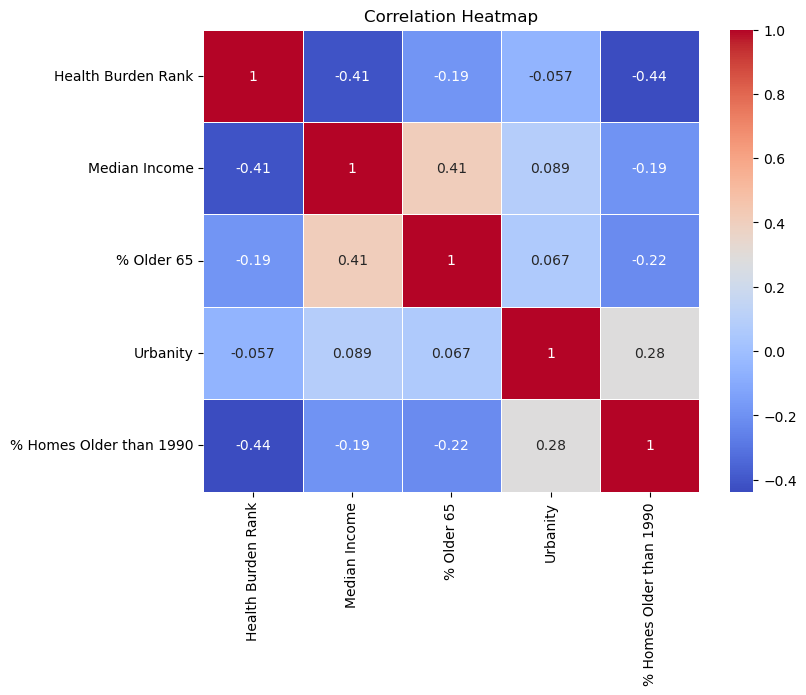

In [9]:
df = pd.DataFrame(data)#sorts the data into a computer readable format

correlation_matrix = df.corr()#finds the correlation of the data

plt.figure(figsize=(8, 6))# creates a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig(save_path + 'Correlation_Heatmap.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [10]:
income_weight = .41/(.41+.19+.057+.44)#finds the relative weight of all the varables 
age_weight = .19/(.41+.19+.057+.44)
urbanity_weight = .057/(.41+.19+.057+.44)
home_age_weight = .44/(.41+.19+.057+.44)
vulnerability_score = []
for c in range(len(zip_codes)):#creates a vulnerability score for the zip codes based on their data and the weights found above
    score = ((income_weight * data['Median Income'][c]) + 
             (age_weight * data['% Older 65'][c]) + 
             (urbanity_weight * data['Urbanity'][c]) + 
             (home_age_weight * data['% Homes Older than 1990'][c])) / 1000
    vulnerability_score.append(round(score, 2))#appends the score
min_index = np.argwhere(vulnerability_score == np.min(vulnerability_score))#finds the minimum vulnerability which is the most at risk neberhood
max_index = np.argwhere(vulnerability_score == np.max(vulnerability_score))#finds the maximum vulnerability which is the leat at risk neberhood
for i in min_index:
    print(f"Safety Score: {vulnerability_score[i[0]]}, Zip Code: {zip_codes[i[0]]}")
for i in max_index:
    print(f"Safety Score: {vulnerability_score[i[0]]}, Zip Code: {zip_codes[i[0]]}")

Safety Score: 10.96, Zip Code: 38105
Safety Score: 65.05, Zip Code: 38139
